In [75]:
import pandas as pd
import numpy as np
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [76]:
# Dataset shape
df.shape

(12294, 7)

In [77]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [78]:
#null values
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [79]:
# Replace missing genres with 'Unknown'
df['genre'] = df['genre'].fillna('')
# Remove commas for TF-IDF compatibility
df['genre_clean'] = df['genre'].str.replace(",", "")

<Axes: >

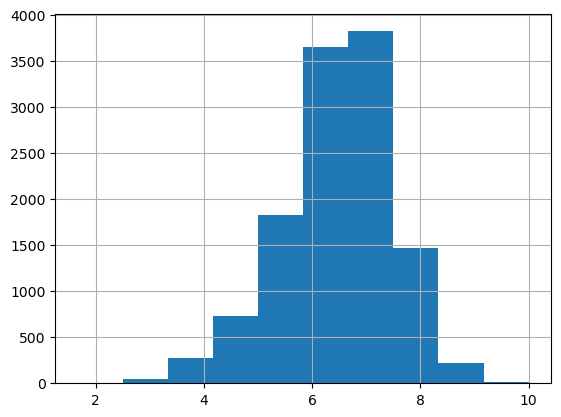

In [80]:
#histogram for rating
df['rating'].hist()

<Axes: >

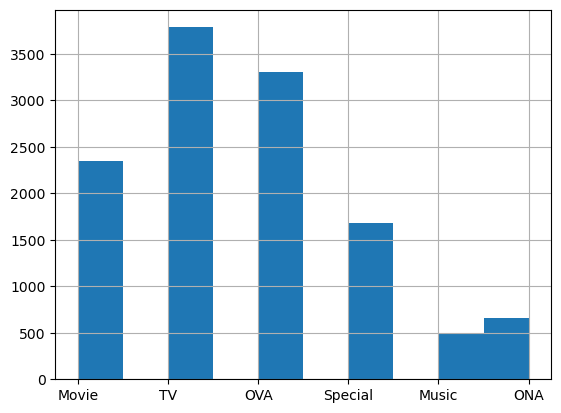

In [81]:
#histogram for type
df['type'].hist()

In [82]:
#Convert Genre Text to TF-IDF Vectors

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df["genre"])

In [83]:
#Cosine_similarity

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim =  cosine_similarity(tfidf_matrix,tfidf_matrix)

In [84]:
#python function to check the related animes--->Using Threshold
def recommend_with_threshold(title, threshold):

    # Get index of the input anime
    idx = df[df["name"] == title].index[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    
    filtered = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]

    # Get recommended indices
    anime_indices = [i for i, _ in filtered]

    return df.loc[anime_indices,['anime_id', 'name','genre','rating']]

In [85]:
#Input  [name, Threshold value (0.2,0.4,0.8) ]
result = recommend_with_threshold("Steins;Gate",0.6)
Anime_recommend = pd.DataFrame(result)
Anime_recommend

,anime_id,name,genre,rating
59,11577,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",8.61
126,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",8.46
196,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Sci-Fi, Thriller",8.34
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN
5126,27387,Under the Dog,"Action, Sci-Fi, Thriller",6.55
5525,7598,Loups=Garous,"Mystery, Sci-Fi, Thriller",6.43
6889,12723,Loups=Garous Pilot,"Mystery, Sci-Fi, Thriller",5.87
5249,17813,Kyoto Animation: Megane-hen,Thriller,6.51
2518,6610,Ibara no Ou,"Action, Mystery, Sci-Fi, Thriller",7.24
5454,28673,Duan Nao,"Mystery, Sci-Fi, Shounen, Thriller",6.42


Performance Analysis of the Recommendation System:
        
1. Working Principle of Model
   *The system uses content-based filtering
   *Anime are represented using genre text
   *Genres are converted into numerical vectors using TF-IDF
   *Cosine similarity measures how similar two anime are
   *Anime with higher similarity scores are recommended

2.Effect of Threshold Values on Performance
   Threshold                  Behavior
    Low (0.2–0.4)            Many recommendations, lower relevance
    Medium (0.5–0.6)         Balanced quantity and quality
    High (0.7–0.8)           Very few but highly similar anime

    Best practical range: 0.5 – 0.6

3.Areas of Improvement
    1. Use Hybrid Recommendation System
    2. Include Additional Features
    3. Weight Important Genres
    4. Improve Text Representation

1. Difference Between User-Based and Item-Based Collaborative Filtering

A.User-Based Collaborative Filtering:

   Concept:Recommends items based on similar users.

How it works:
   *Find users similar to the target user (based on ratings)
   *Recommend items that similar users liked

Example:
   *User A and User B both like Naruto and One Piece
   *User B also likes Attack on Titan
   *Recommend Attack on Titan to User A

Pros:
   *Personalized recommendations
   *Easy to understand

Cons:
   *Scalability issues with many users
   *User preferences change over time

B.Item-Based Collaborative Filtering

   Concept:Recommends items similar to items the user already liked.

How it works:
   *Compute similarity between items
   *Recommend items similar to previously liked items

Example:
   *User liked Fullmetal Alchemist
   *System finds similar anime (Attack on Titan, Hunter x Hunter)
   *Recommends those anime

Pros:
   *More scalable
   *Stable item similarities
   *Used by Amazon, Netflix

Cons:
   Less personalized than user-based

2. What is Collaborative Filtering & How Does It Work?
    *Collaborative Filtering (CF) is a recommendation technique that predicts user preferences based on past interactions of many users.
    *Users who behaved similarly in the past will behave similarly in the future
   
How Collaborative Filtering Works:
 
Step-1: Collect user–item interactions like Ratings, Likes, Views
Step-2: Build a user–item matrix
Step-3: Compute similarity
          *Cosine similarity
          *Pearson correlation
Step-4: Predict missing values

Types of Collaborative Filtering
     1.User-Based CF
     2.Item-Based CF
     3.Model-Based CF
